In [4]:
import numpy as np
import pandas as pd
data = pd.read_sas('DR1IFF_I.xpt')
data = data.dropna()
data = data.sort_values(by=['DR1_020'])
data

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
101014,92052.0,11215.900881,1.460231e+04,2.0,1.0,49.0,2.0,2.0,3.300000e+01,3.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
27400,85998.0,6059.940756,4.918980e+03,1.0,1.0,14.0,2.0,2.0,7.000000e+00,7.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
97331,91767.0,20923.257286,2.651885e+04,1.0,1.0,76.0,2.0,2.0,1.600000e+01,5.0,...,1.097000e+00,5.397605e-79,5.397605e-79,5.250000e-01,5.100000e-02,5.397605e-79,1.900000e-02,5.397605e-79,5.397605e-79,1.000000e-02
36718,86767.0,23380.006267,7.217810e+04,5.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,2.100000e-02,5.397605e-79,5.397605e-79,2.600000e-02,8.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
36717,86767.0,23380.006267,7.217810e+04,4.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,6.103000e+00,1.140000e-01,3.000000e-03,4.144000e+00,3.770000e-01,5.397605e-79,4.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79
36716,86767.0,23380.006267,7.217810e+04,3.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,3.442000e+00,7.100000e-02,1.000000e-03,1.278000e+00,5.500000e-02,5.397605e-79,4.000000e-02,1.000000e-03,6.000000e-03,2.000000e-03
36715,86767.0,23380.006267,7.217810e+04,2.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
36714,86767.0,23380.006267,7.217810e+04,1.0,1.0,75.0,2.0,2.0,3.000000e+00,1.0,...,5.432000e+00,2.700000e-02,5.397605e-79,2.559000e+00,1.260000e-01,5.397605e-79,1.870000e-01,5.397605e-79,6.000000e-03,5.800000e-02
42527,87249.0,11152.310987,1.010016e+04,1.0,1.0,14.0,2.0,2.0,2.000000e+00,7.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
92772,91393.0,65654.848989,7.224344e+04,1.0,1.0,22.0,2.0,2.0,1.100000e+01,3.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [47]:
newdata = data[['SEQN', 'DR1_020', 'DR1ICARB']].copy()
newdata['CHO_MA'] = newdata['DR1ICARB'].rolling(window=10000).mean()
newdata = newdata.dropna()

In [54]:
y = newdata[['CHO_MA']].copy()
x = newdata[['SEQN', 'DR1_020']].copy()

Text(0, 0.5, 'CHO level')

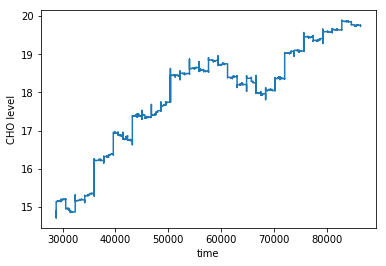

In [58]:
import matplotlib.pyplot as plt
plt.plot(x['DR1_020'], y['CHO_MA'])
plt.xlabel("time")
plt.ylabel("CHO level")

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
print(lr.score(X_train, y_train)*100)
print(lr.score(X_test, y_test)*100)
print(lr.coef_)
print(lr.intercept_)

80.77155882286966
80.8137241145231
[[-9.74556264e-07  7.95706690e-05]]
[13.40660908]


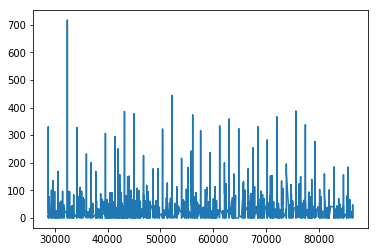

In [63]:
plt.plot(newdata['DR1_020'], newdata['DR1ICARB'])